In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import os 
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

In [62]:
local_address = 'D:/MLDatasets/CreditRisk/'
train = pd.read_csv(local_address + 'application_train.csv')

In [63]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
train.shape

(307511, 122)

In [65]:
train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [66]:
##method for find the categories numbers of every columns
train.select_dtypes('object').apply(pd.Series.nunique,axis =0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [67]:
#train.apply(pd.Series.nunique,axis =0)
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
test = pd.read_csv(local_address+ 'application_test.csv')

In [69]:
#Label Encoding and one-hot Encoding 
le = LabelEncoder()
le_count = 0


for col in train:
    if (train[col].dtype == 'object') and (len(train[col].unique())<=2):
        le.fit(train[col])
        train[col] = le.transform(train[col])
        test[col]= le.transform(test[col])
        le_count += 1
print('%d columns were relabeled' % le_count)


###pd.factorize is better 

3 columns were relabeled


In [70]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)
print(train.shape,test.shape)

(307511, 243) (48744, 239)


In [71]:
y_train = train.TARGET

In [12]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train,test = train.align(test,join = 'inner',axis = 1)

In [14]:
train['TARGET'] = y_train

In [15]:
train.shape

(307511, 240)

In [16]:
test.shape

(48744, 239)

In [17]:
train.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'density plot of DAYS_EMPLOYED')

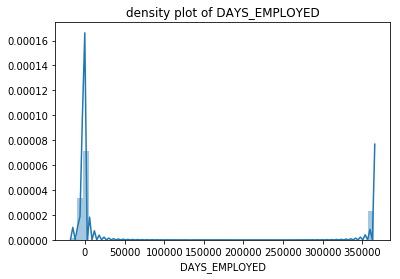

In [18]:
sns.distplot(train.DAYS_EMPLOYED)
plt.title('density plot of DAYS_EMPLOYED')

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Density plot of DAY_EMPLOYED(test set)')

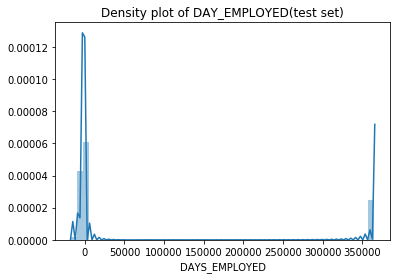

In [19]:
sns.distplot(test.DAYS_EMPLOYED)
plt.title('Density plot of DAY_EMPLOYED(test set)')

In [20]:
###maybe the sysytem set the all these NA values to be largest values, so it became  the 350000 something  
train['DAYS_EMPLOYED_ANOM'] = train['DAYS_EMPLOYED'] == 365243

In [21]:
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace(365243,np.nan)

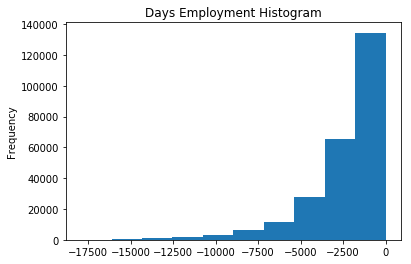

In [22]:
train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')

In [23]:
#change test
test['DAYS_EMPLOYED_ANOM'] = test['DAYS_EMPLOYED'] == 365243
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].replace(365243,np.nan)
print(test['DAYS_EMPLOYED_ANOM'].sum()/len(test))

0.1902593139668472


In [24]:
correlations = train.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n',correlations.tail(15))
print('Most Negative Correlations:\n',correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64
Most Negativ

Text(0.5,1,'Distribution of Ages')

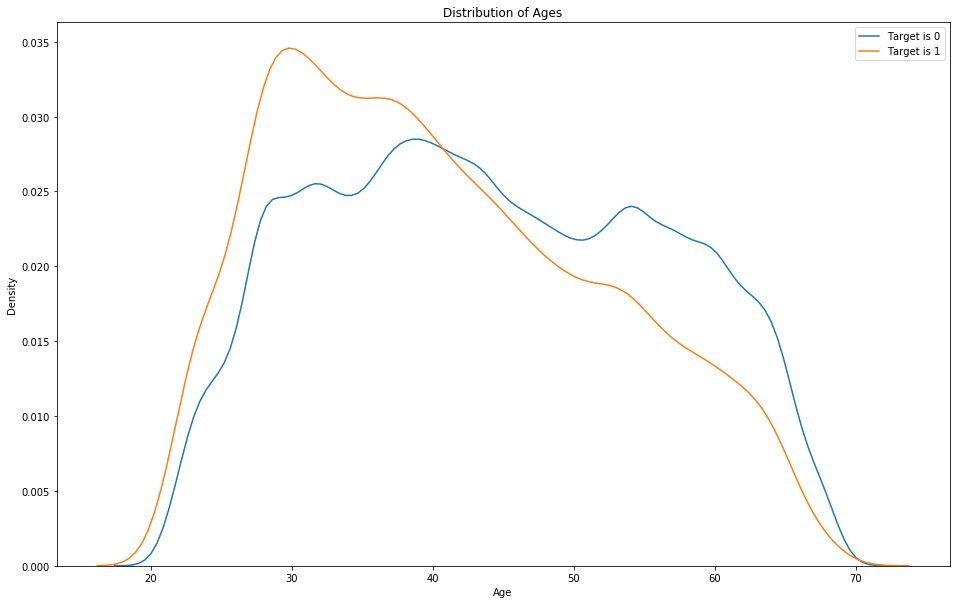

In [25]:
plt.figure(figsize = (16,10))
sns.kdeplot(-train.loc[train['TARGET']==0,'DAYS_BIRTH']/365,label = 'Target is 0')
sns.kdeplot(-train.loc[train['TARGET']==1,'DAYS_BIRTH']/365,label = 'Target is 1')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages')

In [26]:
###pd cut 
age_data = train[['TARGET','DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/365
age_data = np.abs(age_data)
age_data['YEARS_RANGE'] = pd.cut(age_data['YEARS_BIRTH'],bins = np.linspace(20,70,11))

In [27]:
age_data.head()

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_RANGE
0,1.0,9461.0,25.920548,"(25.0, 30.0]"
1,0.0,16765.0,45.931507,"(45.0, 50.0]"
2,0.0,19046.0,52.180822,"(50.0, 55.0]"
3,0.0,19005.0,52.068493,"(50.0, 55.0]"
4,0.0,19932.0,54.608219,"(50.0, 55.0]"


In [28]:
age_group = age_data.groupby('YEARS_RANGE').mean()
age_group

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_RANGE,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5,1,'Failure to Repay by Age Group')

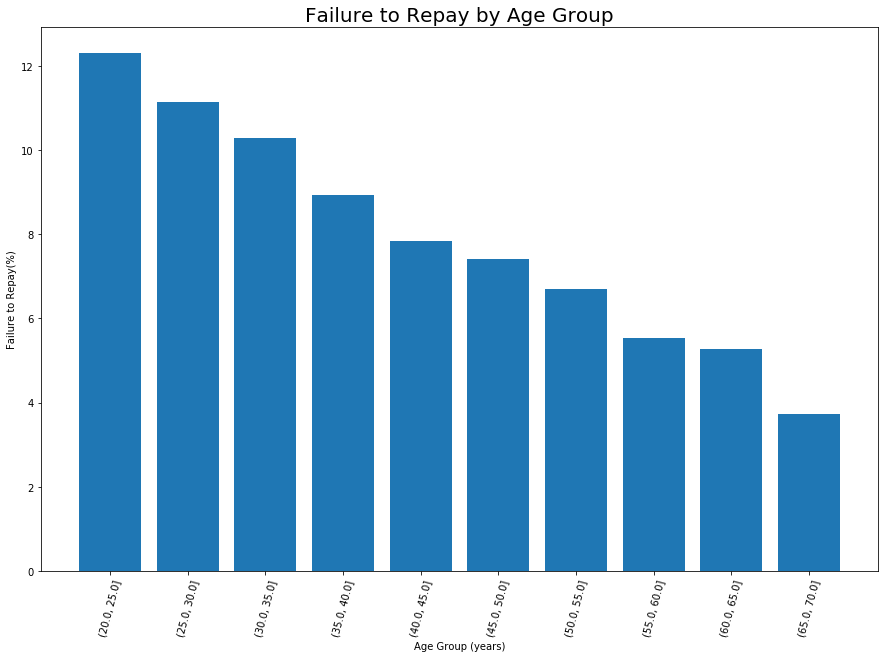

In [29]:
plt.figure(figsize = (15,10))
plt.bar(age_group.index.astype(str),100*age_group['TARGET'])
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay(%)')
plt.title('Failure to Repay by Age Group',fontsize = 20)

### Feature Engineering

In [30]:
##learning create Polynomial Feature
poly_features = train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','TARGET']]
poly_features_test = test[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]

In [31]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy =  'median')
poly_target = poly_features.TARGET
poly_features = poly_features.drop(columns = ['TARGET'])
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 3)

In [33]:
poly_transformer.fit(poly_features)
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)

In [34]:
poly_features = pd.DataFrame(poly_features,columns = poly_transformer.get_feature_names(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']))

In [35]:
poly_features['TARGET'] = poly_target

In [36]:
poly_corrs = poly_features.corr()['TARGET'].sort_values()

In [37]:
poly_corrs.head(10)

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64

In [38]:
poly_corrs.tail(5)

EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64

In [39]:
poly_features_test = pd.DataFrame(poly_features_test,columns = poly_transformer.get_feature_names(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']))

In [40]:
##merge new features into training data 
poly_features['SK_ID_CURR'] = train['SK_ID_CURR']
train_poly = train.merge(poly_features,on = 'SK_ID_CURR',how = 'left')

poly_features_test['SK_ID_CURR'] = test['SK_ID_CURR']
test_poly = test.merge(poly_features_test,on = 'SK_ID_CURR',how = 'left')


In [41]:
train_poly.shape

(307511, 277)

In [42]:
test_poly.shape

(48744, 275)

In [43]:
train_poly,test_poly  = train_poly.align(test_poly,join= 'inner',axis =1)

In [44]:
print(train_poly.shape,test_poly.shape)

(307511, 275) (48744, 275)


In [45]:
train_domain = train.copy()
test_domain = test.copy()

In [46]:
train_domain['CREDIT_INCOME_PERCENT'] = train_domain.AMT_CREDIT/ train_domain.AMT_INCOME_TOTAL
train_domain['ANNUITY_INCOME_PERCENT'] = train_domain.AMT_ANNUITY/train_domain.AMT_INCOME_TOTAL

In [47]:
train_domain['CREDIT_TERM'] = train_domain.AMT_ANNUITY/train_domain.AMT_CREDIT

In [48]:
train_domain['DAYS_EMPLOYED_PERCENT'] = train_domain.DAYS_EMPLOYED/train_domain.DAYS_BIRTH

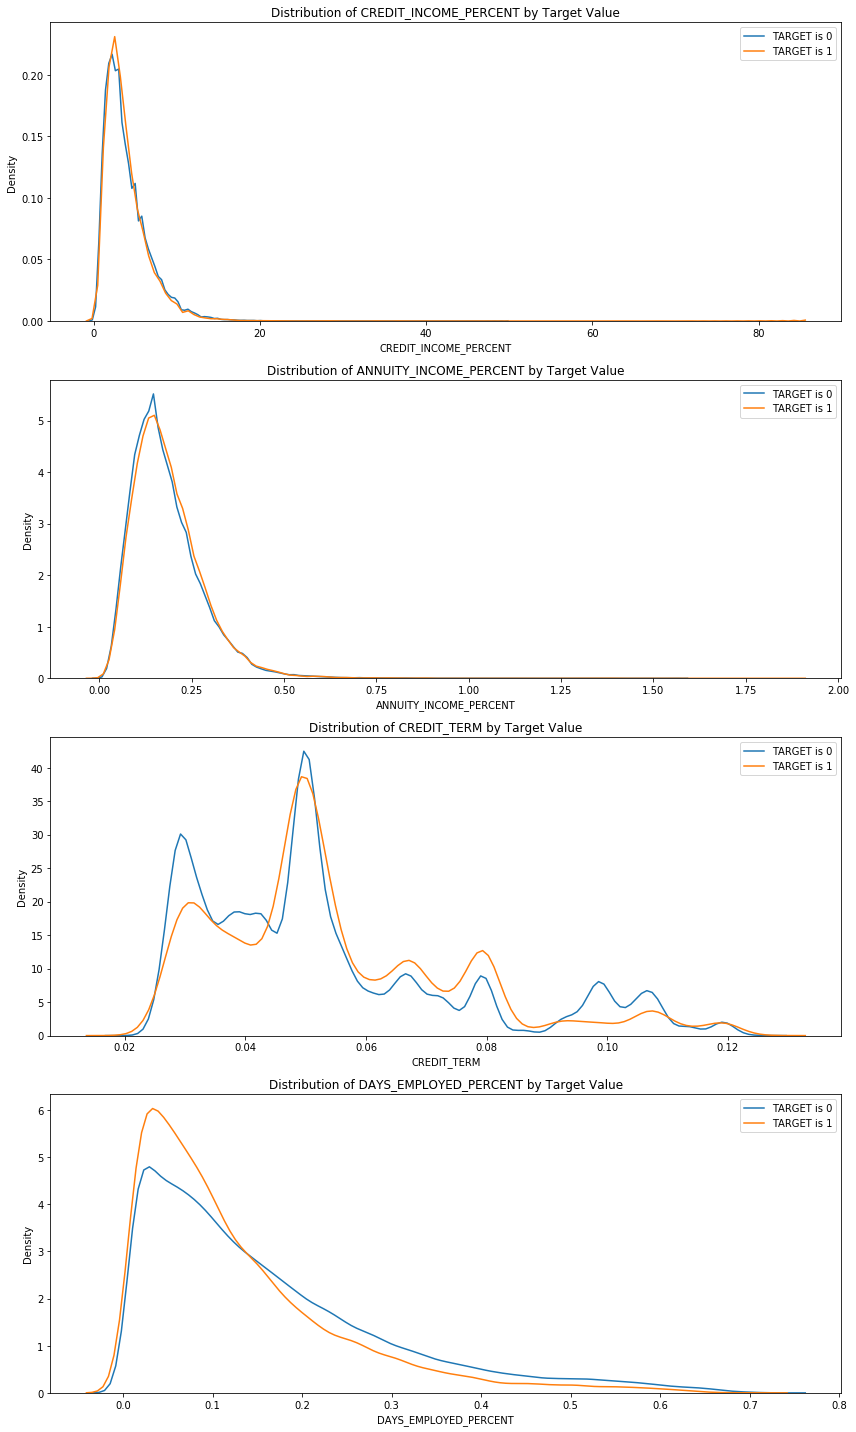

In [49]:
plt.figure(figsize = (12, 20))
for i,feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    plt.subplot(4,1,i+1)
    sns.kdeplot(train_domain.loc[train_domain.TARGET == 0, feature],label = 'TARGET is 0')
    sns.kdeplot(train_domain.loc[train_domain.TARGET == 1, feature],label = 'TARGET is 1')
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature)
    plt.ylabel('Density')

plt.tight_layout()
    

In [50]:
from sklearn.preprocessing import MinMaxScaler,Imputer
x_train = train.drop(columns = ['TARGET'])
features = x_train.columns.values
x_test = test.copy()
imputer = Imputer(strategy='median')
scaler = MinMaxScaler(feature_range = (0,1))
imputer.fit(x_train)
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [51]:
print(x_train.shape,x_test.shape)

(307511, 240) (48744, 240)


In [52]:
y_train = train['TARGET']
print(y_train.shape)

(307511,)


In [53]:
### Build models
#from sklearn.svm import SVC  
#svclassifier = SVC(kernel='linear')  
#svclassifier.fit(x_train, y_train)  
###to long to train 

In [54]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose =1, n_jobs = -1)

In [55]:
RF.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [56]:
feature_importance_values = RF.feature_importances_

In [57]:
feature_importance = pd.DataFrame({'feature':features,'importance':feature_importance_values})

In [58]:
predictions = RF.predict_proba(x_test)[:,1]

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.2s finished


In [59]:
predictions

array([0.13, 0.16, 0.06, ..., 0.08, 0.09, 0.2 ])

In [60]:
submit = test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.to_csv('first_try.csv',index = False)

In [70]:
import lightgbm as lgb